In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
base_dir = "/content/drive/MyDrive/machine learning/project/Dataset"

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [7]:
# prompt: Define image dimensions and batch size

image_width = 150
image_height = 150
batch_size = 32


In [10]:
# Image data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2)  # Use 20% of the data for validation

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation')


Found 320 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [11]:
# prompt: apply CNN Model

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_width, image_height, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Add dropout for regularization
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,  # You might need to adjust the number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


10/10 ━━━━━━━━━━━━━━━━━━━━ 139s 7s/step - accuracy: 0.2954 - loss: 1.4058 - val_accuracy: 0.2656 - val_loss: 1.3747
Epoch 2/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 591ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1875 - val_loss: 1.3699
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.3555 - loss: 1.3621 - val_accuracy: 0.3281 - val_loss: 1.3551
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3750 - val_loss: 1.3190
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.3532 - loss: 1.3526 - val_accuracy: 0.4375 - val_loss: 1.3265
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 183ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 1.2995
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.3487 - loss: 1.3383 - val_accuracy: 0.3281 - val_loss: 1.3022
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3125 - val_loss: 1.3323
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.3987 - loss: 1.2996 - val_a

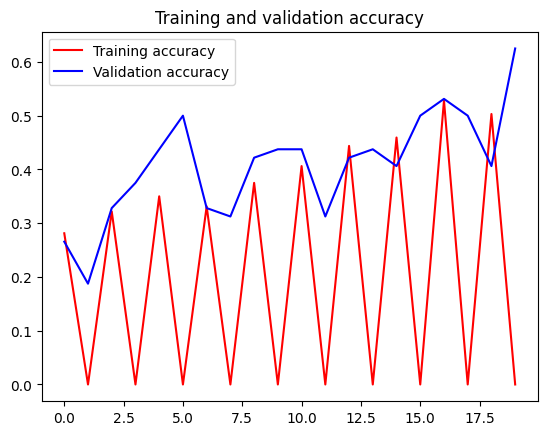

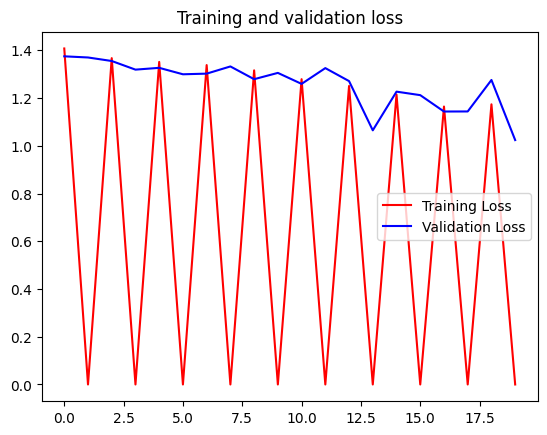

In [15]:
# prompt: Plot training history accuracy and loss

# Plot training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [17]:
# prompt: show the accuracy  in percentage

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy * 100:.2f}%") # Print accuracy as percentage

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.2484 - loss: 1.3732
Validation Loss: 1.373687505722046
Validation Accuracy: 26.25%


In [18]:
# prompt: build the enhanced CNN Model

# Add more convolutional layers and increase filter numbers
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(image_width, image_height, 3)),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Use a different optimizer (e.g., RMSprop) and adjust learning rate
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001),  # Reduced learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Increase the number of epochs or use early stopping
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=30,  # Increased epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 69s 6s/step - accuracy: 0.1847 - loss: 1.3990 - val_accuracy: 0.2500 - val_loss: 1.3831
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2500 - val_loss: 1.3783
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 63s 6s/step - accuracy: 0.2240 - loss: 1.3901 - val_accuracy: 0.2969 - val_loss: 1.3829
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3750 - val_loss: 1.3696
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 64s 6s/step - accuracy: 0.2796 - loss: 1.3821 - val_accuracy: 0.3750 - val_loss: 1.3769
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1875 - val_loss: 1.3790
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 64s 6s/step - accuracy: 0.3318 - loss: 1.3803 - val_accuracy: 0.3281 - val_loss: 1.3769
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+

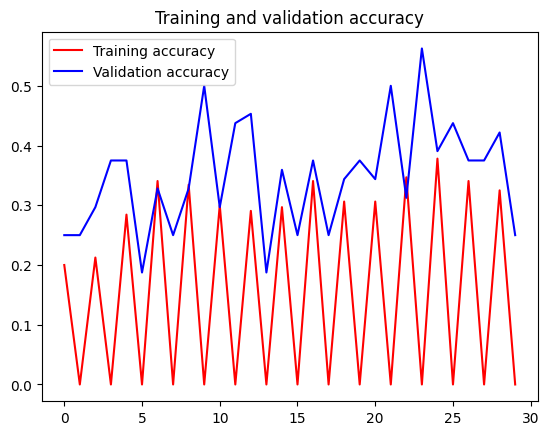

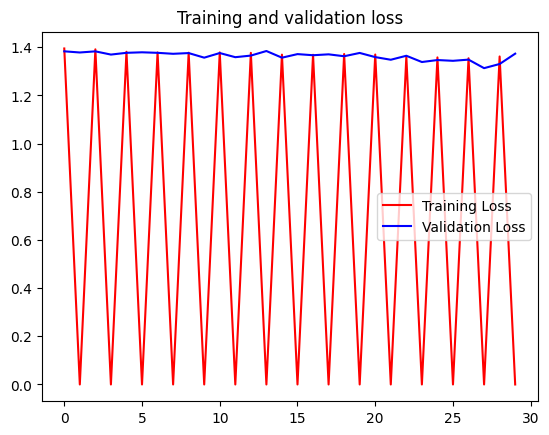

3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4234 - loss: 1.3408
Validation Loss: 1.3420946598052979
Validation Accuracy: 42.50%


In [19]:
# prompt: Plot training history accuracy and loss

# Plot training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0) #add legend to the plot
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend(loc=0) #add legend to the plot
plt.show()

loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy * 100:.2f}%") # Print accuracy as percentage

In [20]:
# prompt: Extract features from images

import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image

def extract_features(img_path):
    # Load the pre-trained VGG16 model without the top classification layer
    model = VGG16(weights='imagenet', include_top=False, pooling='avg')

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Extract features
    features = model.predict(x)

    return features.flatten() # Flatten the feature vector

In [28]:
# prompt: Extract features from training and validation data

import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image

def extract_features(img_path):
    # Load the pre-trained VGG16 model without the top classification layer
    model = VGG16(weights='imagenet', include_top=False, pooling='avg')

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Extract features
    features = model.predict(x)

    return features.flatten() # Flatten the feature vector

# Example usage (replace with your training and validation data paths):
# training_features = []
# for img_path in training_image_paths:
#     features = extract_features(img_path)
#     training_features.append(features)

# validation_features = []
# for img_path in validation_image_paths:
#     features = extract_features(img_path)
#     validation_features.append(features)

In [30]:
import os
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# ... (Your previous code to define extract_features) ...

# Assuming 'base_dir' is defined as before
# train_dir = os.path.join(base_dir, 'train')   # Remove these lines
# validation_dir = os.path.join(base_dir, 'validation') # Remove these lines

def get_image_paths_and_labels(directory):
    image_paths = []
    labels = []
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name) # class_dir is now a subfolder within base_dir
        for filename in os.listdir(class_dir):
            if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust file extensions if needed
                image_paths.append(os.path.join(class_dir, filename))
                labels.append(class_name)  # Assuming folder names are class labels
    return image_paths, labels

training_image_paths, training_labels = get_image_paths_and_labels(base_dir) # Use base_dir directly
validation_image_paths, validation_labels = get_image_paths_and_labels(base_dir) # Use base_dir directly

training_features = []
for img_path in training_image_paths:
    features = extract_features(img_path)
    training_features.append(features)

validation_features = []
for img_path in validation_image_paths:
    features = extract_features(img_path)
    validation_features.append(features)

# Convert lists to numpy arrays for scikit-learn
training_features = np.array(training_features)
training_labels = np.array(training_labels)
validation_features = np.array(validation_features)
validation_labels = np.array(validation_labels)

# ... (Rest of your code for training the Random Forest classifier) ...

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 972ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 997ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 919ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 724ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1000ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 961ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 696ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 966

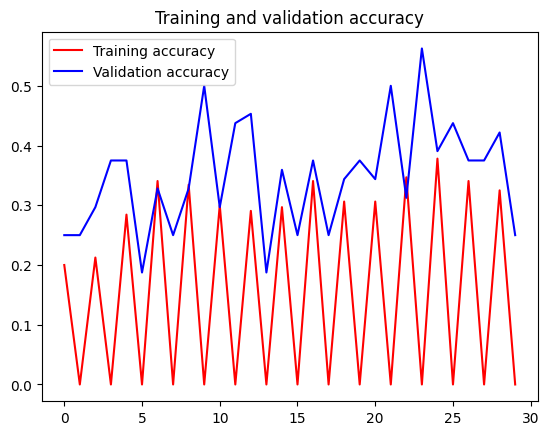

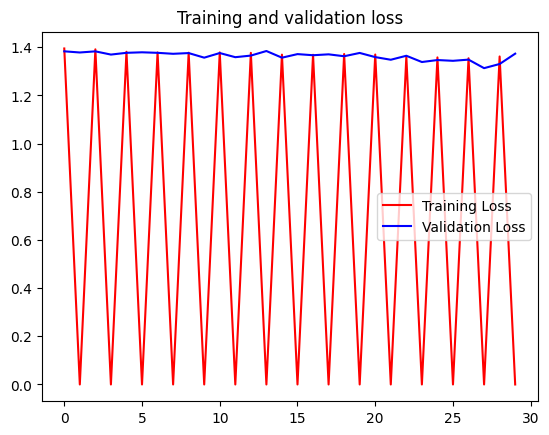

Validation Accuracy: 100.00%


In [36]:
# prompt: Train a Random Forest Classifier on extracted features

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming you have training_features, training_labels, validation_features, and validation_labels
# Replace these placeholders with your actual data

# Example data (replace with your extracted features and labels)
# training_features = np.array(training_features) #Convert list to numpy array
# training_labels = np.array(training_labels)
# validation_features = np.array(validation_features) #Convert list to numpy array
# validation_labels = np.array(validation_labels)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters
rf_classifier.fit(training_features, training_labels)

# Make predictions on the validation set
validation_predictions = rf_classifier.predict(validation_features)

# prompt: Plot training history accuracy and loss for random forest

import matplotlib.pyplot as plt

# Assuming 'history' object is available from your model training
# Example: history = model.fit(...)

# Plot training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.show()

# Evaluate the model
accuracy = accuracy_score(validation_labels, validation_predictions)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")